In [15]:
import pandas as pd
df=pd.read_csv('dataset.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,09/07/2024,10500,11000,10800,25
1,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,17/07/2024,11100,11800,11500,25
2,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,19/07/2024,11200,11750,11500,25
3,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,22/07/2024,11300,11900,11600,25
4,Uttar Pradesh,Gautam Budh Nagar,Dadri,Wheat,Dara,FAQ,25/07/2024,2400,2550,2475,1


In [16]:
df.shape

(26488, 11)

In [17]:
df.isnull().sum()

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df['Modal_Price'].value_counts()

Modal_Price
1900    444
1200    432
1300    383
1800    373
1700    343
       ... 
6625      1
1295      1
6515      1
1356      1
5912      1
Name: count, Length: 1350, dtype: int64

In [20]:
!pip install seaborn


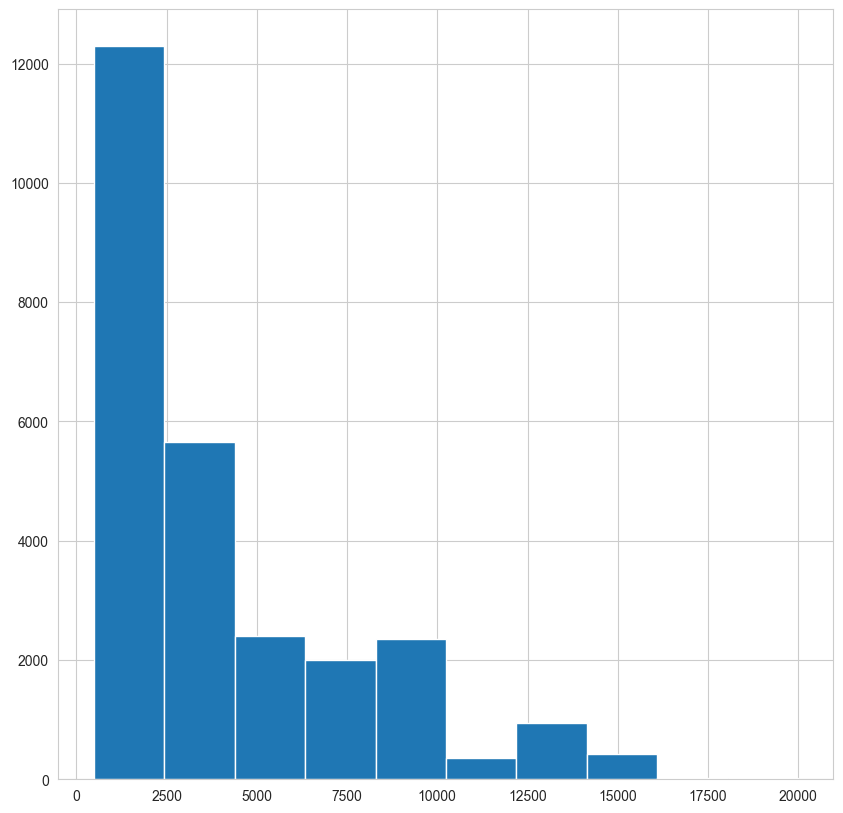

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(df['Modal_Price'])
plt.show()


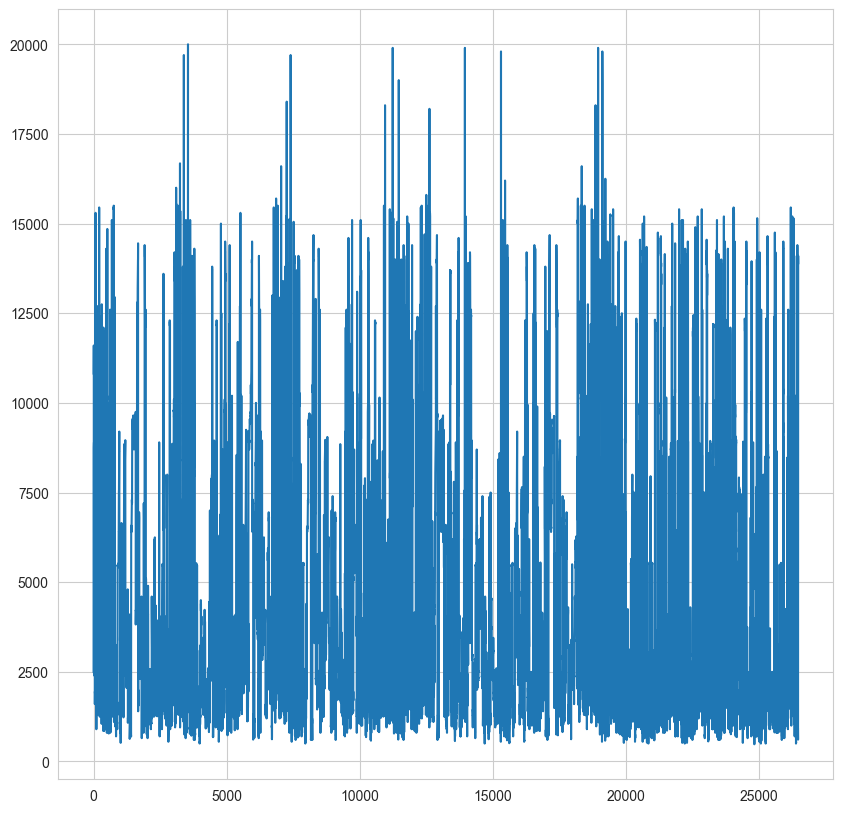

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df['Modal_Price'])
plt.show()


In [23]:
df.head(2)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,09/07/2024,10500,11000,10800,25
1,Uttar Pradesh,Gautam Budh Nagar,Dadri,Garlic,Garlic,FAQ,17/07/2024,11100,11800,11500,25


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(df):
    sns.set_style("whitegrid")

    numeric_cols = ['Min_Price', 'Max_Price', 'Modal_Price']
    categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

    df[numeric_cols].hist(figsize=(12, 5), bins=30, edgecolor='black')
    plt.suptitle('Distribution of Numerical Features')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[numeric_cols])
    plt.title('Boxplot of Numerical Features')
    plt.show()

    # Count
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()
#BI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Min_Price'],y=df['Max_Price'], hue=df['Commodity'], alpha=0.7)
    plt.title('Min_Price vs Max_Price')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Commodity', y='Modal_Price')
    plt.xticks(rotation=45)
    plt.title('Commodity vs Modal_Price')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    sns.pairplot(df[numeric_cols])
    plt.suptitle('Pair Plot of Numerical Features')
    plt.show()





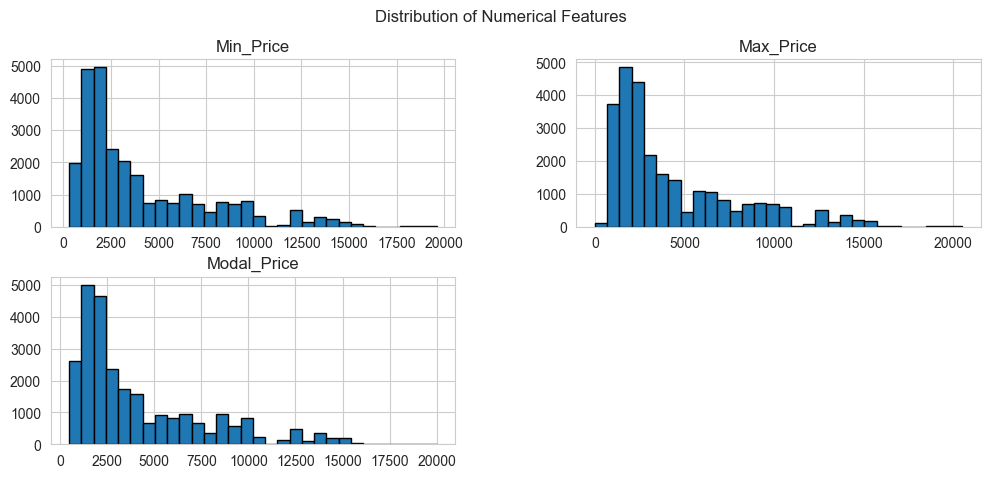

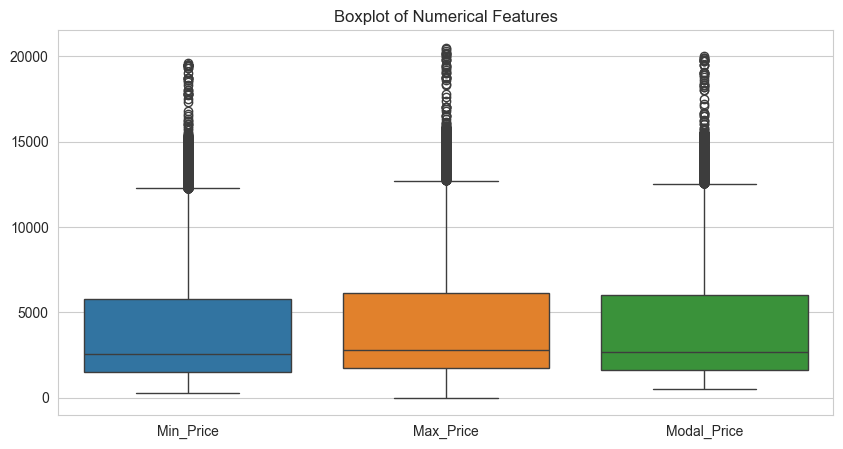

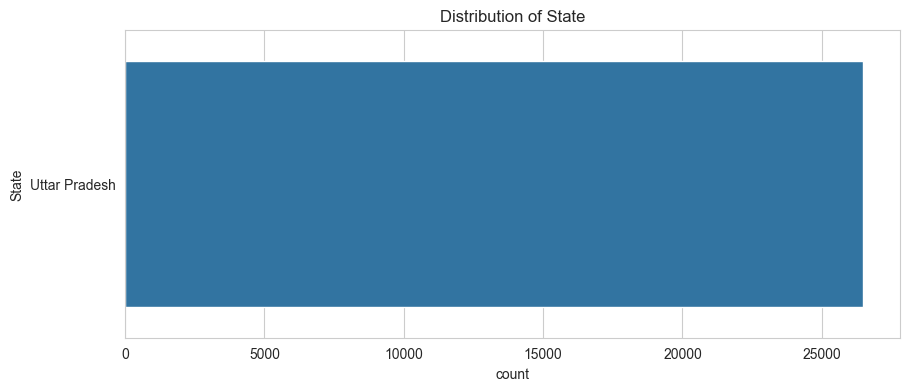

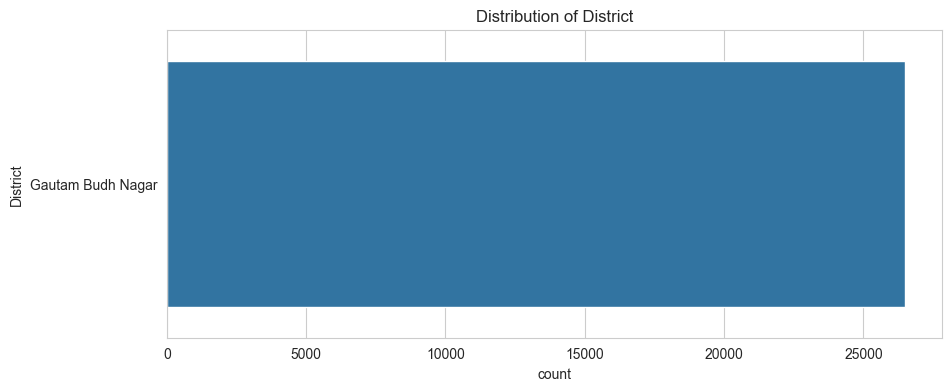

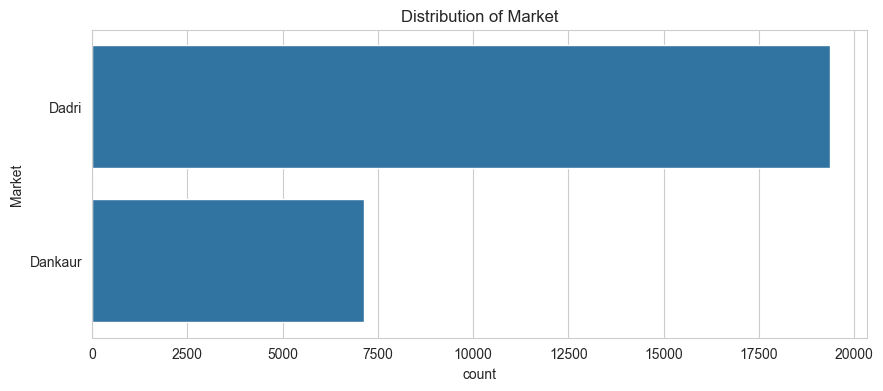

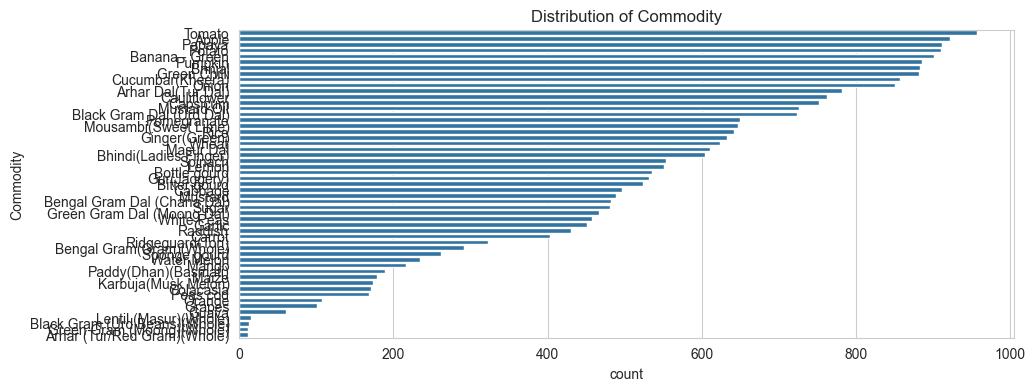

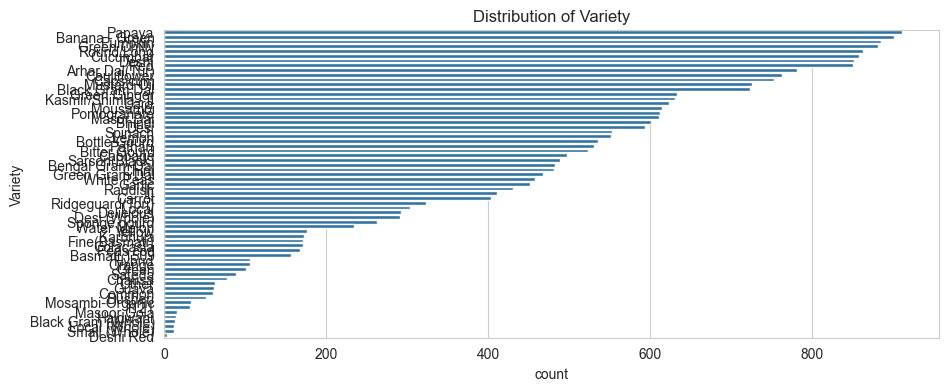

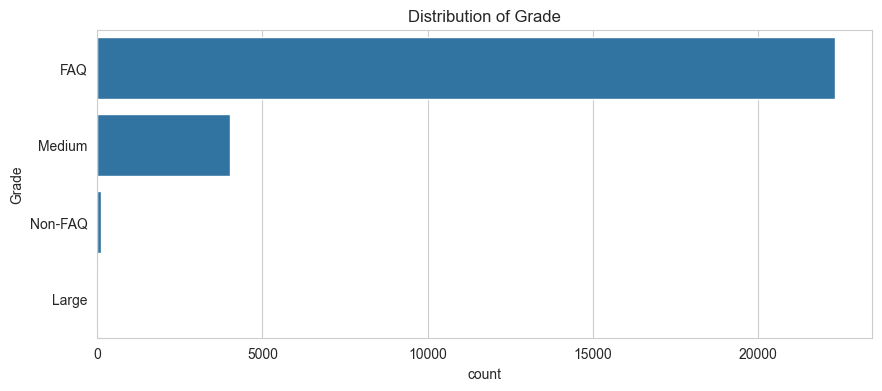

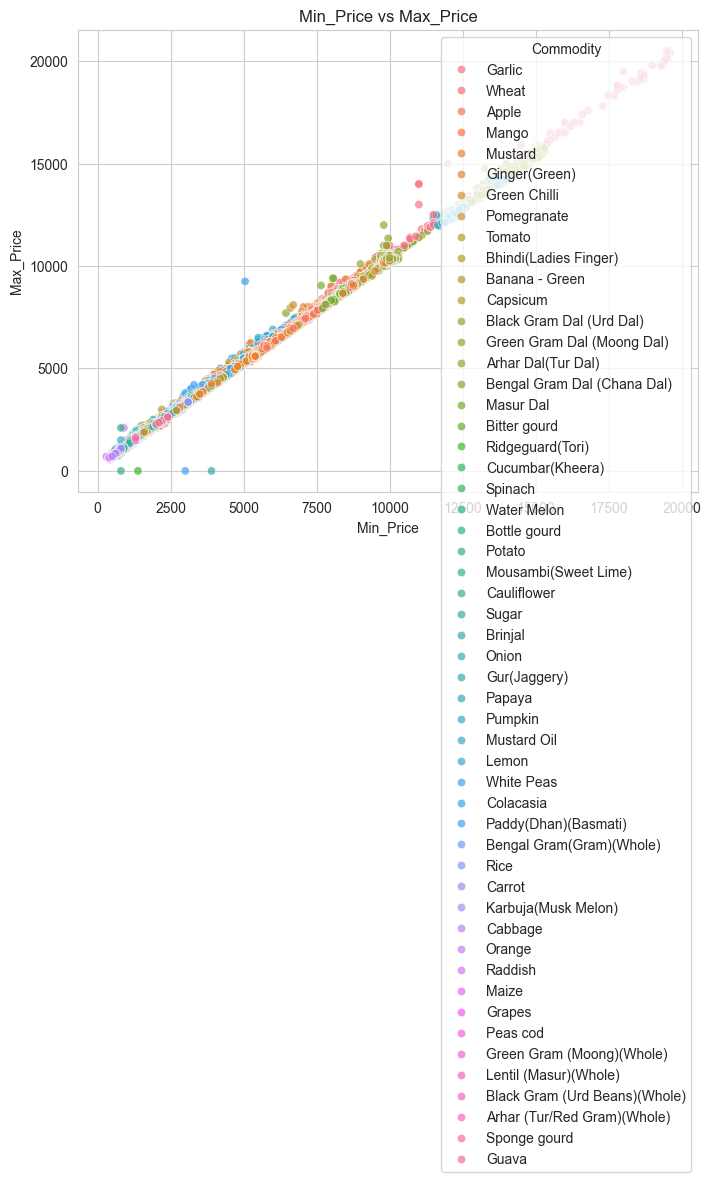

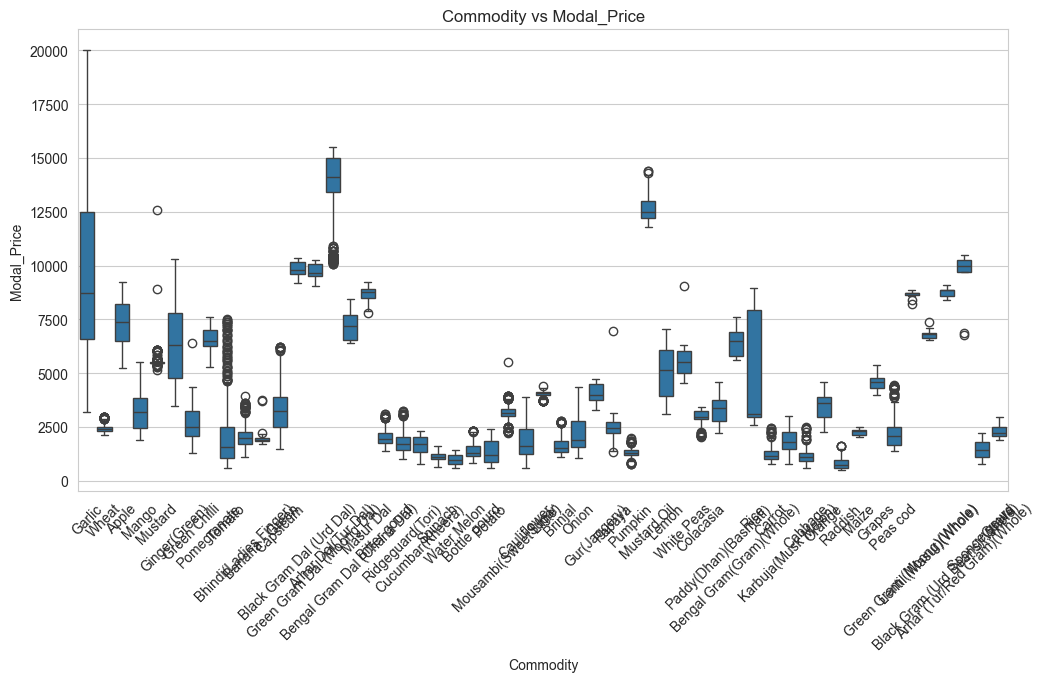

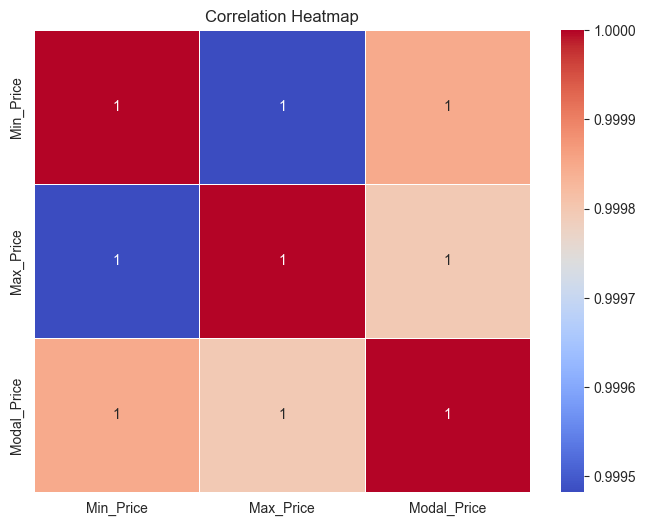

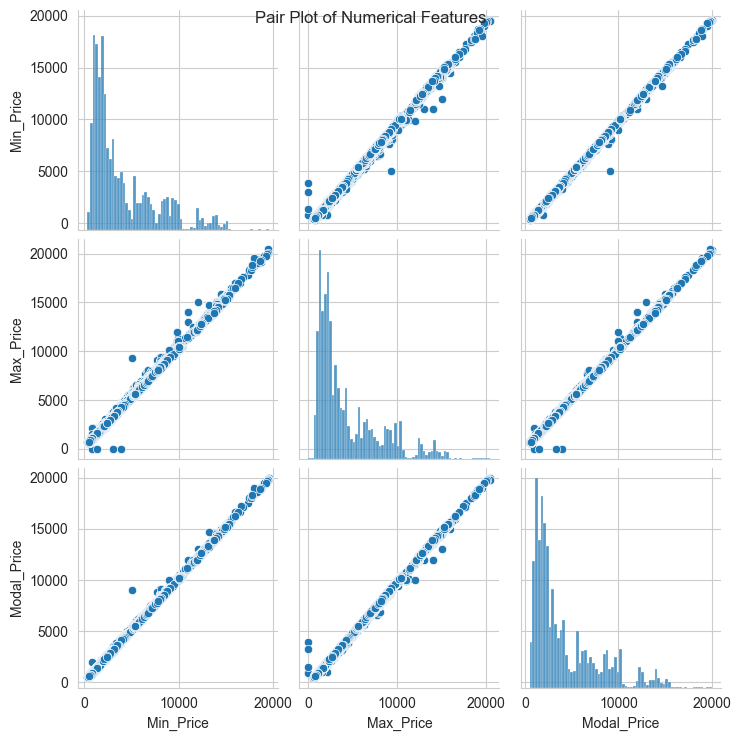

In [25]:
visualize_data(df)

In [26]:
df.sample(10)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
1114,Uttar Pradesh,Gautam Budh Nagar,Dadri,Capsicum,Capsicum,FAQ,26/12/2023,1650,1850,1750,164
6424,Uttar Pradesh,Gautam Budh Nagar,Dadri,Sugar,Chini,FAQ,25/03/2023,3600,3800,3700,48
8770,Uttar Pradesh,Gautam Budh Nagar,Dadri,Sugar,Chini,FAQ,27/11/2023,4120,4320,4220,48
2052,Uttar Pradesh,Gautam Budh Nagar,Dadri,Lemon,Lemon,FAQ,24/12/2023,3400,3600,3500,310
11227,Uttar Pradesh,Gautam Budh Nagar,Dadri,Wheat,Dara,FAQ,27/12/2024,2750,2950,2840,1
5372,Uttar Pradesh,Gautam Budh Nagar,Dadri,Ginger(Green),Green Ginger,FAQ,03/04/2024,8000,8900,8500,103
6535,Uttar Pradesh,Gautam Budh Nagar,Dadri,Maize,Yellow,FAQ,09/10/2023,2000,2200,2100,4
12974,Uttar Pradesh,Gautam Budh Nagar,Dadri,Potato,Desi,FAQ,28/12/2023,650,900,740,24
2681,Uttar Pradesh,Gautam Budh Nagar,Dadri,Tomato,Deshi,FAQ,02/01/2024,1050,1350,1200,78
22268,Uttar Pradesh,Gautam Budh Nagar,Dankaur,Ginger(Green),Green Ginger,FAQ,09/12/2023,5800,6150,6000,103


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reload the original DataFrame to ensure it has not been modified
df = pd.read_csv('dataset.csv')

categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string if necessary
    label_encoders[col] = le  # Store encoder for future use (optional)

# Define features (X) and target variable (y)
X = df.drop(columns=['Modal_Price'])  # Features
y = df['Modal_Price']  # Target variable

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset shapes
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (21190, 10) (21190,)
Test set: (5298, 10) (5298,)


In [29]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Commodity_Code    0
dtype: int64
0


In [30]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')
df['Days_Since_Start'] = (df['Arrival_Date'] - df['Arrival_Date'].min()).dt.days
df.drop(columns=['Arrival_Date'], inplace=True)

In [31]:
print(X_train.dtypes)


State              int64
District           int64
Market             int64
Commodity          int64
Variety            int64
Grade              int64
Arrival_Date      object
Min_Price          int64
Max_Price          int64
Commodity_Code     int64
dtype: object


In [32]:
print(X_train.shape, y_train.shape)


(21190, 10) (21190,)


In [33]:
df.sample(4)

,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Commodity_Code,Days_Since_Start
22279,0,0,1,12,10,0,600,800,700,154,282
2527,0,0,0,25,49,0,3550,3900,3750,74,318
5383,0,0,0,3,2,0,1750,1950,1850,90,369
11597,0,0,0,49,21,0,830,1040,920,78,705


In [34]:
X_train = X_train.drop(columns=['Arrival_Date'], errors='ignore')
X_test = X_test.drop(columns=['Arrival_Date'], errors='ignore')


In [35]:
print(X_train.dtypes)


State             int64
District          int64
Market            int64
Commodity         int64
Variety           int64
Grade             int64
Min_Price         int64
Max_Price         int64
Commodity_Code    int64
dtype: object


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(n_estimators=90, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')


Mean Absolute Error (MAE): 12.825502509448945
Mean Squared Error (MSE): 730.8711178084422
R2 Score: 0.9999436880377573


In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Average R2 Score: {cv_scores.mean()}')


Cross-Validation R2 Scores: [0.99992636 0.99991228 0.99991903 0.99991173 0.99993223]
Average R2 Score: 0.9999203265194005


In [38]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ada = AdaBoostRegressor(n_estimators=100, random_state=42)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

print(f'AdaBoost - Mean Absolute Error (MAE): {mae_ada}')
print(f'AdaBoost - Mean Squared Error (MSE): {mse_ada}')
print(f'AdaBoost - R2 Score: {r2_ada}')


AdaBoost - Mean Absolute Error (MAE): 206.4510609537199
AdaBoost - Mean Squared Error (MSE): 70587.17741780357
AdaBoost - R2 Score: 0.9945614180493502


In [39]:
print("Random Forest Performance:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}\n')

print("AdaBoost Performance:")
print(f'MAE: {mae_ada}')
print(f'MSE: {mse_ada}')
print(f'R2 Score: {r2_ada}')


Random Forest Performance:
MAE: 12.825502509448945
MSE: 730.8711178084422
R2 Score: 0.9999436880377573

AdaBoost Performance:
MAE: 206.4510609537199
MSE: 70587.17741780357
R2 Score: 0.9945614180493502


In [40]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.00001)
rg.fit(X_train,y_train)
y_pred_rg=rg.predict(X_test)
r2_rg = r2_score(y_test,y_pred_rg)
r2_rg



c:\Users\J Chaitanya Sai\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.91868e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.9999404329012309

In [41]:
df.sample(2)

,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Commodity_Code,Days_Since_Start
2971,0,0,0,27,38,0,3000,3400,3200,310,312
2616,0,0,0,51,19,0,2400,2600,2500,1,401


In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.00001)
lasso.fit(X_train,y_train)
y_pred_rg=lasso.predict(X_test)
r2_rg = r2_score(y_test,y_pred_rg)
r2_rg



0.9999149283899774

In [43]:
import pickle
with open('ada.pkl','wb') as file:
  pickle.dump(ada,file)

In [44]:
with open('ada.pkl','rb') as file:
  load_model=pickle.load(file)

In [45]:
type(df['District'])

pandas.core.series.Series